# Assignment 2: Training the Fully Recurrent Network

*Author:* Thomas Adler

*Copyright statement:* This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for  personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.


## Exercise 1: Data generation

There are two classes, both occurring with probability 0.5. There is one input unit. Only the first sequence element conveys relevant information about the class. Sequence elements at positions $t > 1$ stem from a Gaussian with mean zero and variance 0.2. The first sequence element is 1.0 (-1.0) for class 1 (2). Target at sequence end is 1.0 (0.0) for class 1 (2)

Write a function `generate_data` that takes an integer `T` as argument which represents the sequence length. Seed the `numpy` random generator with the number `0xDEADBEEF`. Implement the [Python3 generator](https://docs.python.org/3/glossary.html#term-generator) pattern and produce data in the way described above. The input sequences should have the shape `(T, 1)` and the target values should have the shape `(1,)`.

In [11]:
%matplotlib inline
import numpy as np
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt

class FullyRecurrentNetwork(object):
    def __init__(self, D, I, K):
        self.W = np.random.uniform(-0.01, 0.01, (I, D))
        self.R = np.random.uniform(-0.01, 0.01, (I, I))
        self.V = np.random.uniform(-0.01, 0.01, (K, I))
    
    def forward(self, x, y):
        # helper function for numerically stable loss
        def f(z):
            return np.log1p(np.exp(-np.absolute(z))) + np.maximum(0, z)
        
        # infer dims
        T, D = x.shape
        K, I = self.V.shape

        # init result arrays
        self.x = x
        self.y = y
        self.a = np.zeros((T, I))

        # iterate forward in time 
        # trick: access model.a[-1] in first iteration
        for t in range(T):
            self.a[t] = np.tanh(self.W @ x[t] + self.R @ self.a[t-1])
            
        self.z = model.V @ self.a[t]
        return y * f(-self.z) + (1-y) * f(self.z)

T, D, I, K = 10, 3, 5, 1
model = FullyRecurrentNetwork(D, I, K)
model.forward(np.random.uniform(-1, 1, (T, D)), 1)

def generate_data(T):
    ########## YOUR SOLUTION HERE ##########
    seed_sequenc = int(0xDEADBEEF)
    labels_class = np.random.choice([1,2], p=[0.5,0.5])
    print(labels_class)
    seq_array = np.zeros((T,1))
    seq_array[0,0] = 1 if labels_class == 1 else -1
    seq_array[1:,0] = np.random.normal(0,np.sqrt(0.2),T-1)
    target = np.array([1.0 if labels_class == 1 else 0.0])
        
    return seq_array, target
   
    

data = generate_data(2)
print(data)

2
(array([[-1.       ],
       [ 0.1879807]]), array([0.]))


## Exercise 2: Gradients for the network parameters
Compute gradients of the total loss 
$$
L = \sum_{t=1}^T L(t), \quad \text{where} \quad L(t) = L(z(t), y(t))
$$
w.r.t. the weights of the fully recurrent network. To this end, find the derivative of the loss w.r.t. the logits and hidden pre-activations first, i.e., 
$$
\psi^\top(t) = \frac{\partial L}{\partial z(t)} \quad \text{and} \quad \delta^\top(t) = \frac{\partial L}{\partial s(t)}.
$$
With the help of these intermediate results you should be able to compute the gradients w.r.t. the weights, i.e., $\nabla_W L, \nabla_R L, \nabla_V L$. 

*Hint: Take a look at the computational graph from the previous assignment to see the functional dependencies.*

*Remark: Although we only have one label at the end of the sequence, we consider the more general case of evaluating a loss at every time step in this exercise (many-to-many mapping).*

########## YOUR SOLUTION HERE 

$
L = \sum_{t=1}^T L(t), \quad \text{where} \quad L(t) = L(z(t), y(t))
$

$
\psi^\top(t) = \frac{\partial L}{\partial z(t)} \quad = \frac{\partial L(z(t), y(t))}{\partial z(t)} \quad
$

$
\delta^\top(t) = \frac{\partial L}{\partial s(t)} \quad = \frac{\partial L(z(t), y(t))}{\partial s(t)} \quad
$

for:

$\delta^\top(t) = \frac{\partial L}{\partial s} = \frac{\partial L}{\partial a}*\frac{\partial a}{\partial s}$


$\frac{\partial s}{\partial w} = x(t)$

$\frac{\partial s}{\partial r} = a(t-1)$

$\nabla_W L  = \sum_{t=1}^T \frac{\partial L}{\partial W} = \sum_{t=1}^T \frac{\partial L(z(t), y(t))}{\partial W} =\sum_{t=1}^T \frac{\partial L}{\partial y}\frac{\partial y}{\partial a}\frac{\partial a}{\partial s}\frac{\partial s}{\partial w} =\sum_{t=1}^T \delta^\top(t)x(t)$

$\nabla_R L  = \sum_{t=1}^T \frac{\partial L}{\partial R} = \sum_{t=1}^T \frac{\partial L(z(t), y(t))}{\partial R} =\sum_{t=1}^T \frac{\partial L}{\partial y}\frac{\partial y}{\partial a}\frac{\partial a}{\partial s}\frac{\partial s}{\partial r} =\sum_{t=1}^T \delta^\top(t)a(t-1)$

$\nabla_V L  = \sum_{t=1}^T \frac{\partial L}{\partial V} =\sum_{t=1}^T \frac{\partial L(z(t), y(t))}{\partial V} =\sum_{t=1}^T \frac{\partial L}{\partial y}\frac{\partial y}{\partial v} =\sum_{t=1}^T h'(V^\top a(t))V^\top $

And that's the general loss function without specfic formules for (Mean squared error, Cross-entropy, etc.)



## Exercise 3: The backward pass
Write a function `backward` that takes a model `self` as argument. The function should compute the gradients of the loss with respect to all model parameters and store them to `self.dW`, `self.dR`, `self.dV`, respectively. 

In [15]:
def backward(self):
    ########## YOUR SOLUTION HERE ##########
    def f(z):
            return np.log1p(np.exp(-np.absolute(z))) + np.maximum(0, z)
    self.dW = np.zeros((I,D))
    self.dR = np.zeros((I,I))
    self.dV = np.zeros((K,I))
    self.gL_z = self.y * f(-self.z) + (1-self.y) * f(self.z)
    
    t = len(self.a)

    delta = np.zeros_like(self.a)
    for t in reversed(range(T)):
        gl_z = self.gL_z
        #print(gl_z.shape)
        #print(gl_z[t].shape)
       # print(self.a[t].T.shape)
        #print(self.dV.shape)
        self.dV += gl_z @ self.a[t].reshape(1,5)
       
        delta_t = gl_z @ self.V + delta @ self.R.T * f(self.a[t])
     #   print('delta:',delta.shape)
      #  print('x:',self.x.shape)
        self.dW += delta.T @ self.x
      
        if t > 0:
            self.dR += np.outer(delta[t], self.a[t])

        return self.dV, self.dR, self.dW
        


FullyRecurrentNetwork.backward = backward
model.backward()

(array([[-0.00234847, -0.00355682, -0.0010427 , -0.00280772, -0.00764002]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

## Exercise 4: Gradient checking
Write a function `grad_check` that takes a model `self`, a float `eps` and another float `thresh` as arguments and computes the numerical gradients of the model parameters according to the approximation
$$
f'(x) \approx \frac{f(x + \varepsilon) - f(x - \varepsilon)}{2 \varepsilon}.
$$
If any of the analytical gradients are farther than `thresh` away from the numerical gradients the function should throw an error. 

In [57]:
def grad_check(self, eps, thresh):
    ########## YOUR SOLUTION HERE ##########
    #num_grad = []
    #x1 = self.x
    #x2 = self.x
    y = self.y
    x = self.x
    analytical_grad = model.backward()
    #for val in self.__dict__.values():
    for name, val in self.__dict__.items():
        if isinstance(val, np.ndarray):
        #print(f"Value of {name}: \n{val}") 
           print(f"Attribute name: {name}")
        
           it = np.nditer(val, flags=['multi_index'])
           for _ in it:
               idx = it.multi_index 
               x = np.random.uniform(-1, 1, (T, D))
               x1 = x + eps
               x2 = x -  eps
               pos_gradient = self.forward(x1, 1)
               neg_gradient = self.forward(x2, 1)
               num_grad = (pos_gradient - neg_gradient) / (2 * eps)
               dV, dR, dW = model.backward()      
               gradients = {"dV": dV, "dR": dR, "dW": dW}

        
               analytical_grad = gradients[name][idx]
               difference = np.abs(num_grad - analytical_grad)
               if difference > thresh:
                  
                   return False  
                    
               x1[idx] -= eps
               x2[idx] += eps

    print("Gradient check passed.")
    return True

    print(type(num_grad))
    print(num_grad.shape)
    print(num_grad)
    print(type(analytical_grad))
    #print(analytical_grad.shape)
    print(analytical_grad)
    
    
    success = (np.abs(num_grad - analytical_grad) < thresh).all()

FullyRecurrentNetwork.grad_check = grad_check
model.grad_check(1e-7, 1e-7)

Attribute name: W


KeyError: 'W'

## Exercise 5: Parameter update

Write a function `update` that takes a model `self` and a float argument `eta`, which represents the learning rate. The method should implement the gradient descent update rule $\theta \gets \theta - \eta \nabla_{\theta}L$ for all model parameters $\theta$.

In [50]:
def update(self, eta):
    ########## YOUR SOLUTION HERE ##########
    for par in self.__dict__.values():
            #if isinstance(val, np.ndarray):
            par = par - eta * par
            return par

FullyRecurrentNetwork.update = update
model.update(0.001)

array([[-0.00866351,  0.00795997, -0.00951414],
       [-0.00552908,  0.00209654,  0.000786  ],
       [ 0.00084346,  0.00752198, -0.00239975],
       [-0.00727239, -0.00938722,  0.00264336],
       [ 0.00405113, -0.00701504,  0.00489049]])

## Exercise 6: Network training

Train the fully recurrent network with 32 hidden units. Start with input sequences of length one and tune the learning rate and the number of update steps. Then increase the sequence length by one and tune the hyperparameters again. What is the maximal sequence length for which the fully recurrent network can achieve a performance that is better than random? Visualize your results. 

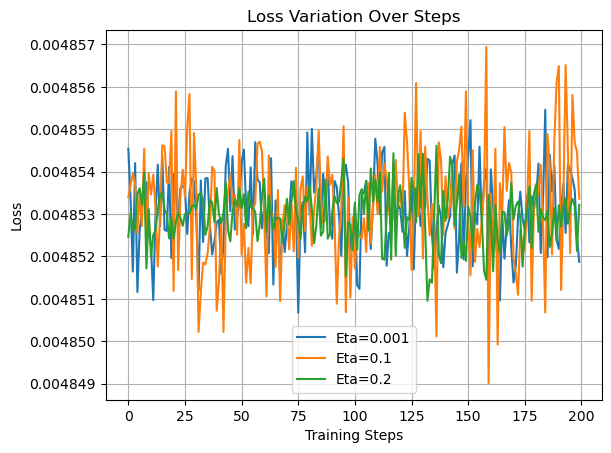

In [53]:
########## YOUR SOLUTION HERE ##########
import numpy as np
import matplotlib.pyplot as plt
def reset_parameters(self):
        self.W = np.random.uniform(-0.01, 0.01, (I, D))
        self.R = np.random.uniform(-0.01, 0.01, (I, I))
        self.V = np.random.uniform(-0.01, 0.01, (K, I))
    
def train(self, sequence_length, eta, steps, T):
        total_loss = []
        x = np.random.uniform(-1, 1, (T, D))
        y = np.random.randint(0, K, size=(T, K))  
        for step in range(steps):
            
            predictions = self.forward(np.random.uniform(-1, 1, (T, D)), 1)
            loss = np.mean((predictions - y) ** 2)
            total_loss.append(loss)
            dV, dR, dW = self.backward()

            self.V -= eta * dV
            self.R -= eta * dR
            self.W -= eta * dW
        return total_loss

def train_and_evaluate_sequence_lengths(frnn, max_length, eta_range, steps_range, T):
    
    performance = []
    sequence_lengths = list(range(1, max_length + 1))
    losses = {}
    
    for eta in eta_range:
        avg_losses = np.zeros(steps_range)
        for seq_len in sequence_lengths:
       
            frnn.reset_parameters()  
            total_loss = frnn.train( seq_len, eta, steps_range,T)  
            avg_losses += np.array(total_loss)
            avg_losses /= max_length
        plt.plot(range(steps_range), avg_losses, label=f"Eta={eta}")
           
    return losses
        

# Example usage:
FullyRecurrentNetwork.train = train
FullyRecurrentNetwork.reset_parameters = reset_parameters
T, D, I, K = 10, 3, 5, 1
eta_range = [0.001  , 0.1, 0.2]
steps_range = 200
max_length = 100
model = FullyRecurrentNetwork(D, I, K)
losses = train_and_evaluate_sequence_lengths(model, max_length, eta_range, steps_range, T)

plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Loss Variation Over Steps")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 7: The Vanishing Gradient Problem

Analyze why the network is incapable of learning long-term dependencies. Show that $\|\frac{\partial a(T)}{\partial a(1)}\|_2 \leq \|R\|_2^{T-1}$ , where $\|\cdot\|_2$ is the spectral norm, and discuss how that affects the propagation of error signals through the time dimension of the network. 

*Hint: Use the fact that the spectral norm is submultiplicative for square matrices, i.e. $\|AB\|_2 \leq \|A\|_2\|B\|_2$ if $A$ and $B$ are both square.*

########## YOUR SOLUTION HERE ##########

if $\|R\|_2 > 1$ so $\|R\|_2^{T-1}$  will tend to zero causing a vanishing gradient and if $\|R\|_2 < 1$ so $\|R\|_2^{T-1}$ will grow exponentially with time so causing exploding gradient.

That gets us to the problem of sub multiplicative property of the spectral norm which means that for the square matrics $A  and  B$ $\|AB\|_2\leq \|A\|_2\|B\|_2$ so depending on the value of $\|R\|_2$ by applying this property on the chain rule for learning, the likelihood will tend to zero of will explode reaching a value that will become too large and destabilize training.

so this property tends to be a problem in repetitive tasks or time dependants so applications like model training and backpropagation it will cause instability of training due to the high number of timesteps.